In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

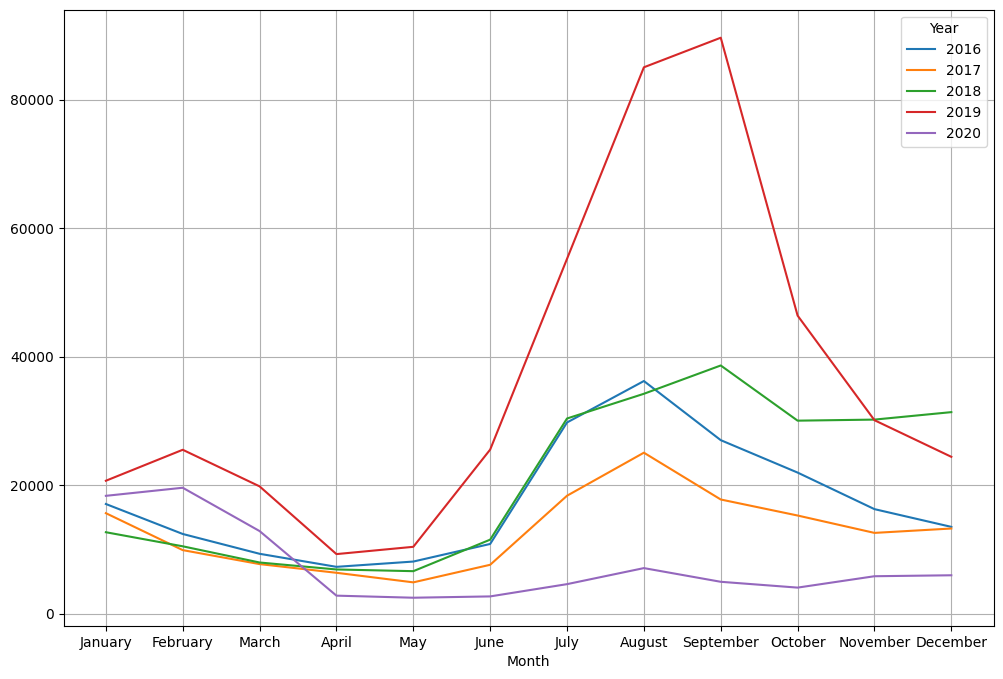

In [8]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


In [9]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1> LINE PLOT WITH SEABORN </h1>

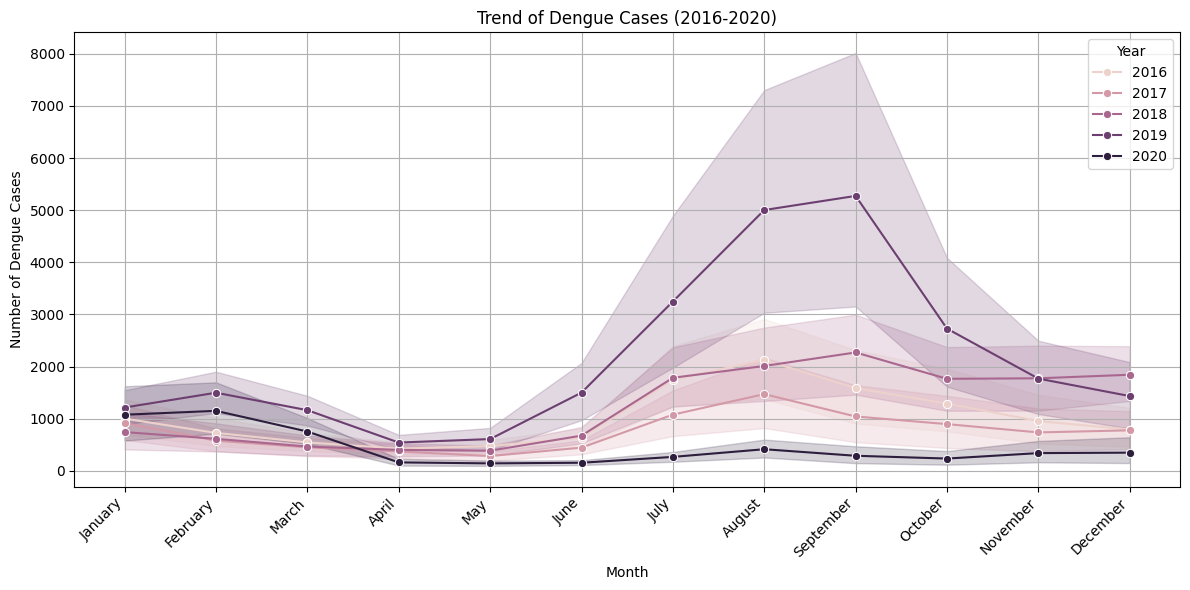

In [10]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Dengue_Cases', hue='Year', data=dengue, marker='o')
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

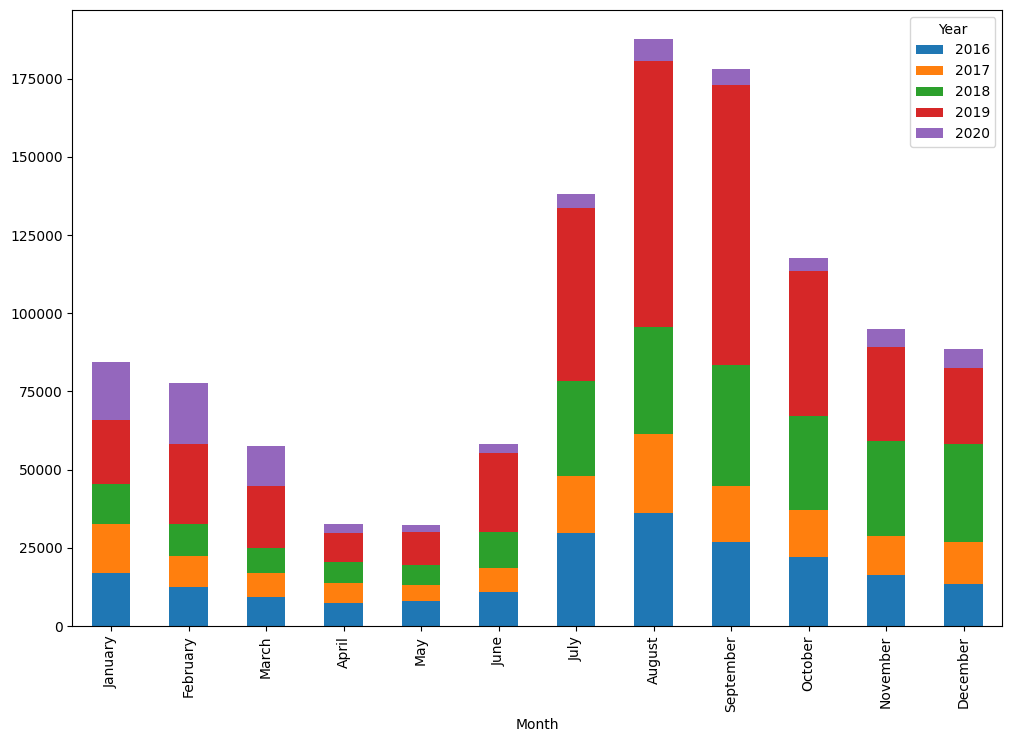

In [11]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

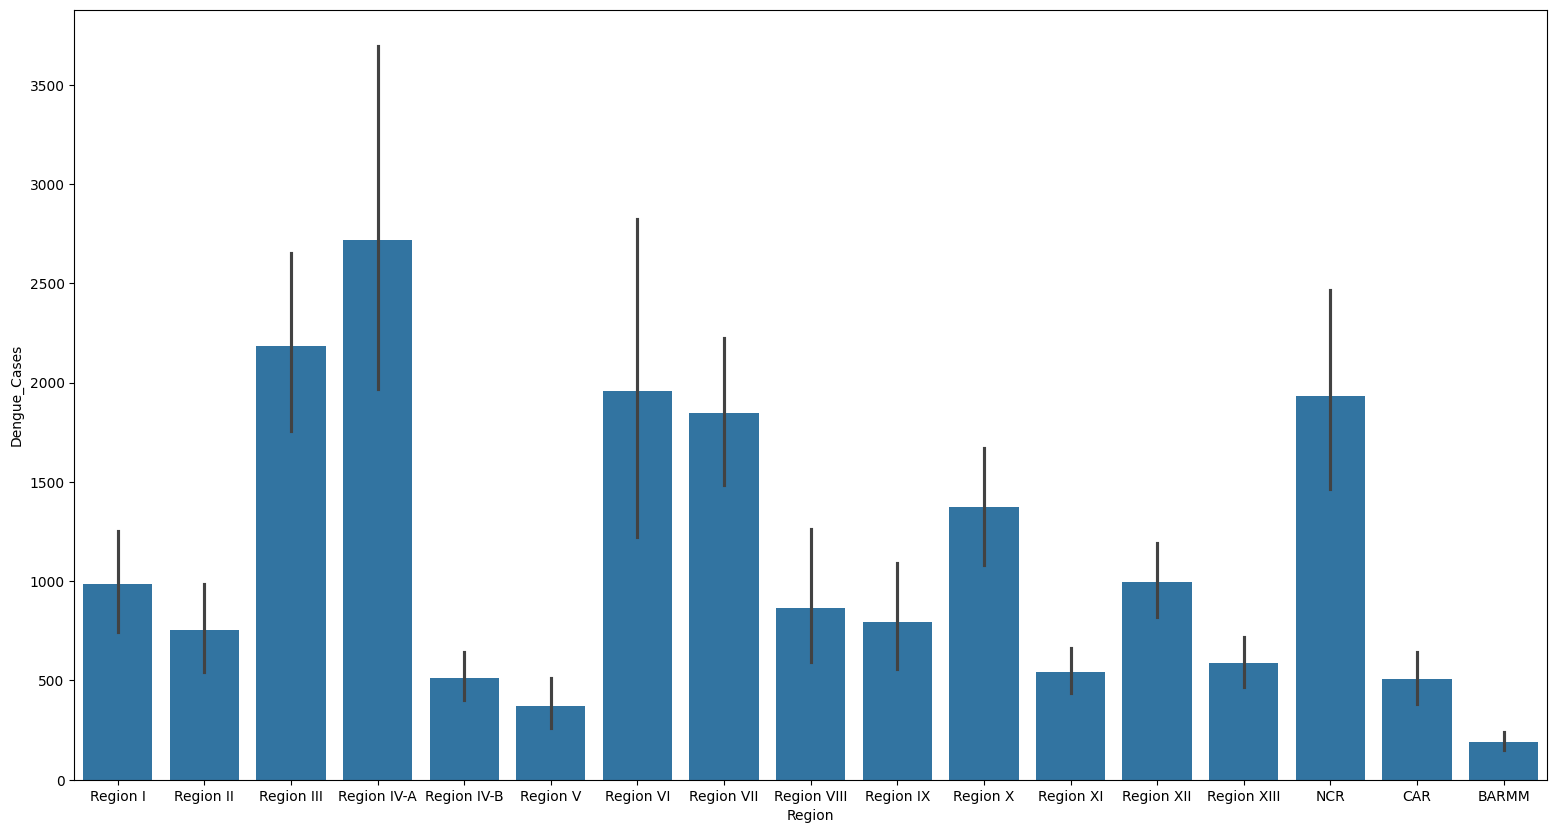

In [12]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [13]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [14]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [15]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [16]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


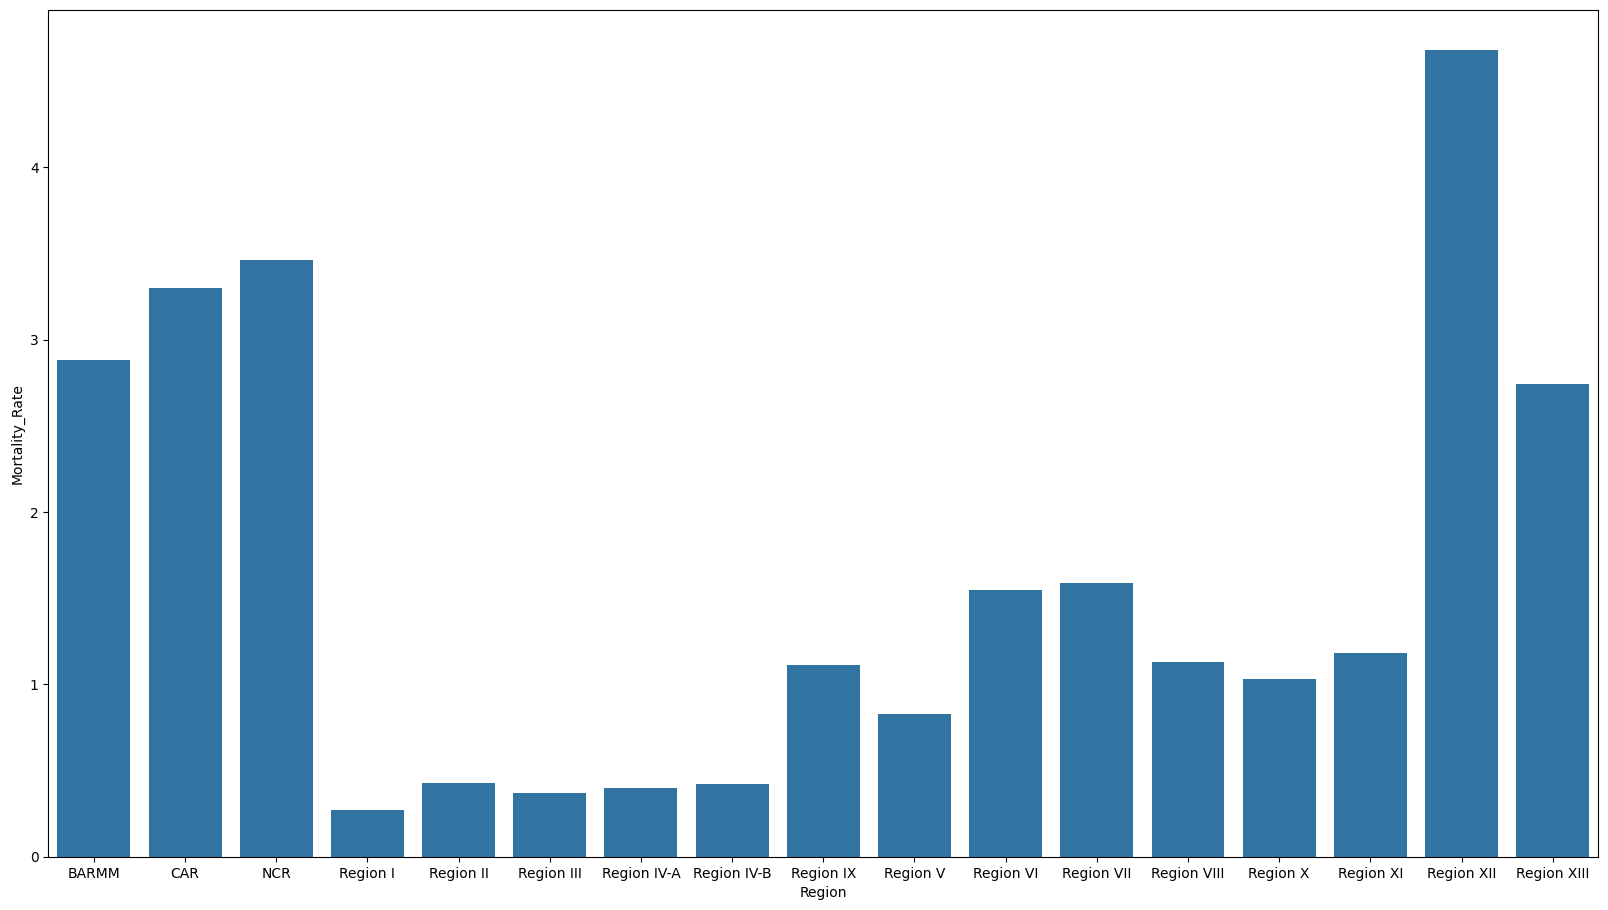

In [17]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

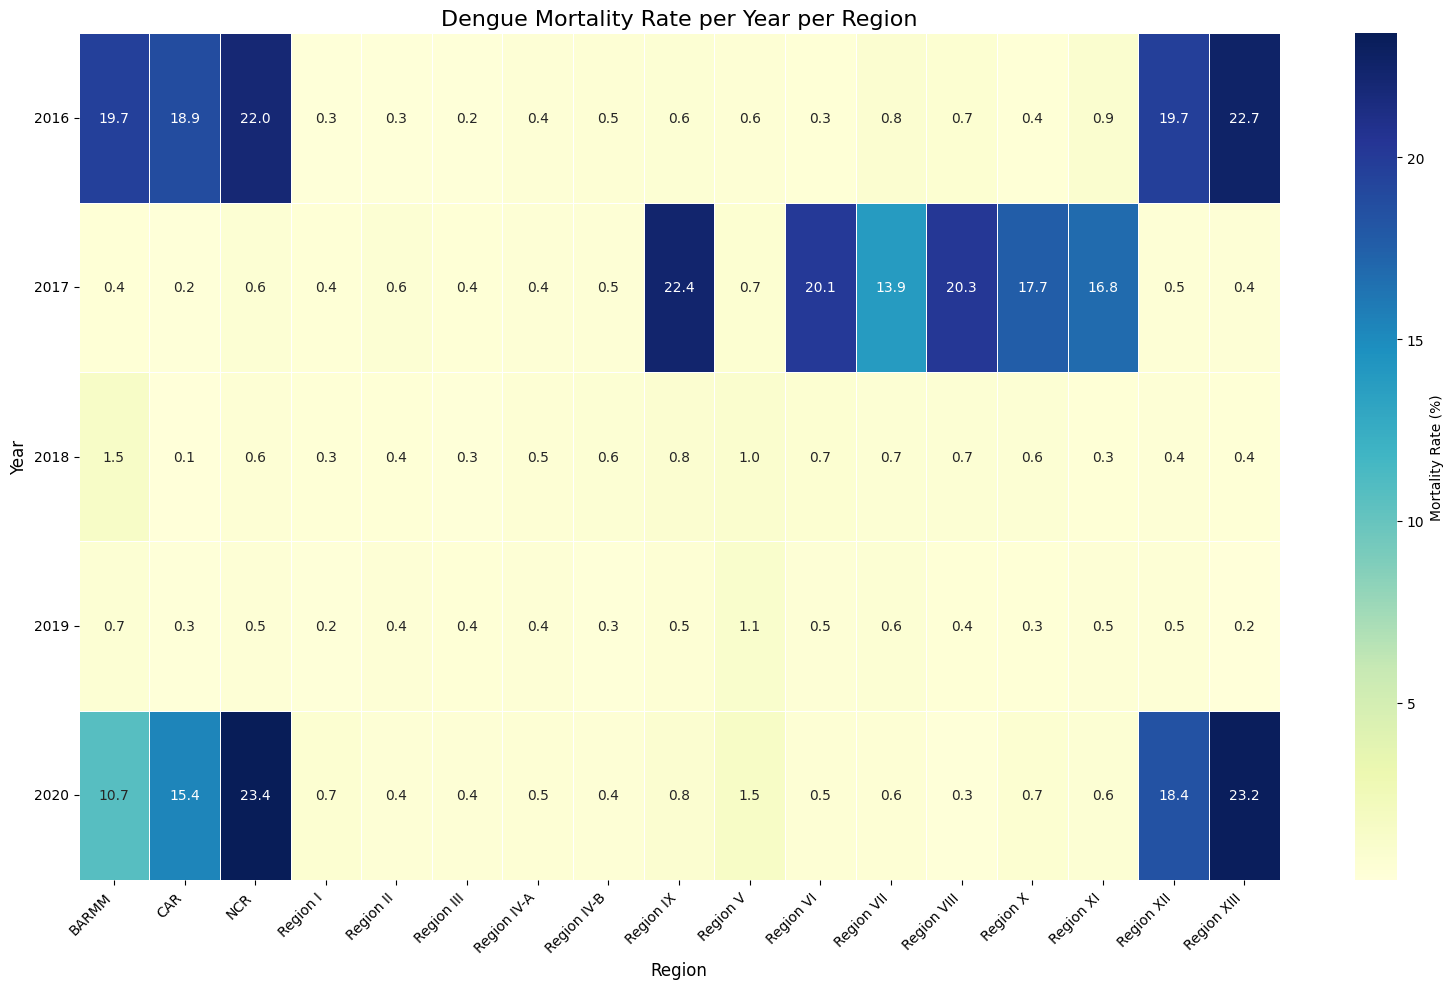

In [18]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVES </h1>

In [19]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016,Region I,705,1,0.141844
1,February,2016,Region I,374,0,0.000000
2,March,2016,Region I,276,0,0.000000
3,April,2016,Region I,240,2,0.833333
4,May,2016,Region I,243,1,0.411523
...,...,...,...,...,...,...
1015,August,2020,BARMM,91,0,0.000000
1016,September,2020,BARMM,16,8,50.000000
1017,October,2020,BARMM,13,9,69.230769
1018,November,2020,BARMM,15,1,6.666667


In [20]:
dengue['Month'] = dengue['Month'].astype('str')

In [21]:
# Combine Month and Year into a Date column
dengue['Date'] = pd.to_datetime(dengue['Month'] + ' ' + dengue['Year'].astype(str))

# Optional: sort by date
dengue = dengue.sort_values('Date')

In [22]:
region_df = dengue[dengue['Region'] == 'Region IV-A']
monthly_cases = region_df.groupby('Date')['Dengue_Cases'].sum().reset_index()

In [23]:
#pip intall scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# # Convert dates to ordinal for regression

monthly_cases['Date_Ordinal'] = monthly_cases['Date'].map(pd.Timestamp.toordinal)

# # # Reshape for sklearn
X = monthly_cases['Date_Ordinal'].values.reshape(-1, 1) #independent variable 
y = monthly_cases['Dengue_Cases'].values   #dependent variable 

# # # Fit model
model = LinearRegression()
model.fit(X, y)

# # # Predict
monthly_cases['Predicted_Cases'] = model.predict(X)

# # # Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")

The model explains 1.7% of the variation in dengue cases.


## Death Predictions
---

In [25]:
region_df = dengue[dengue['Region'] == 'NCR']
region_df = region_df.sort_values('Date')

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

# One-hot encode month
X = pd.get_dummies(region_df['Month'], drop_first=True)
y = region_df['Dengue_Deaths']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

region_df['Dengue_Death_Predicted_Cases'] = model.predict(X)

# Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")

The model explains 22.9% of the variation in dengue cases.


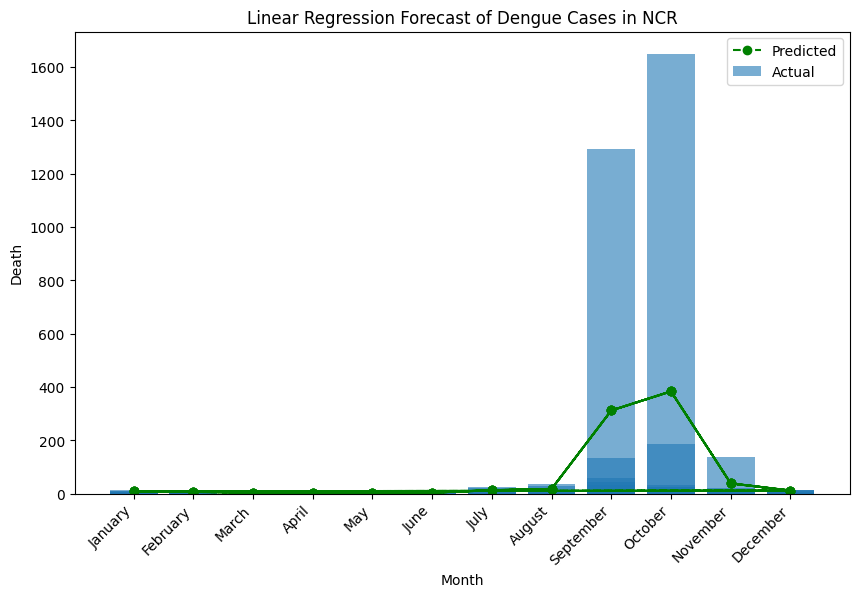

In [27]:

# Sort the dataframe by Month
# region_df = region_df.sort_values('Month')

plt.figure(figsize=(10,6))
plt.bar(region_df['Month'], region_df['Dengue_Deaths'], label='Actual', alpha=0.6)
plt.plot(region_df['Month'], region_df['Dengue_Death_Predicted_Cases'], label='Predicted', linestyle='--', marker='o', color="green")
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases in NCR')
plt.xlabel('Month')
plt.ylabel('Death')
plt.xticks(rotation=45, ha='right')
plt.show()

## Dengue Cases Prediction
---

In [31]:
region_df = dengue[dengue['Region'] == 'BARMM']
region_df = region_df.sort_values('Date')

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# One-hot encode month
X = pd.get_dummies(region_df['Month'], drop_first=True)
y = region_df['Dengue_Cases']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

region_df['Dengue_Predicted_Cases'] = model.predict(X)

# Evaluate: R-squared
r_squared = model.score(X, y)
print(f"The model explains {r_squared:.1%} of the variation in dengue cases.")

The model explains 16.4% of the variation in dengue cases.


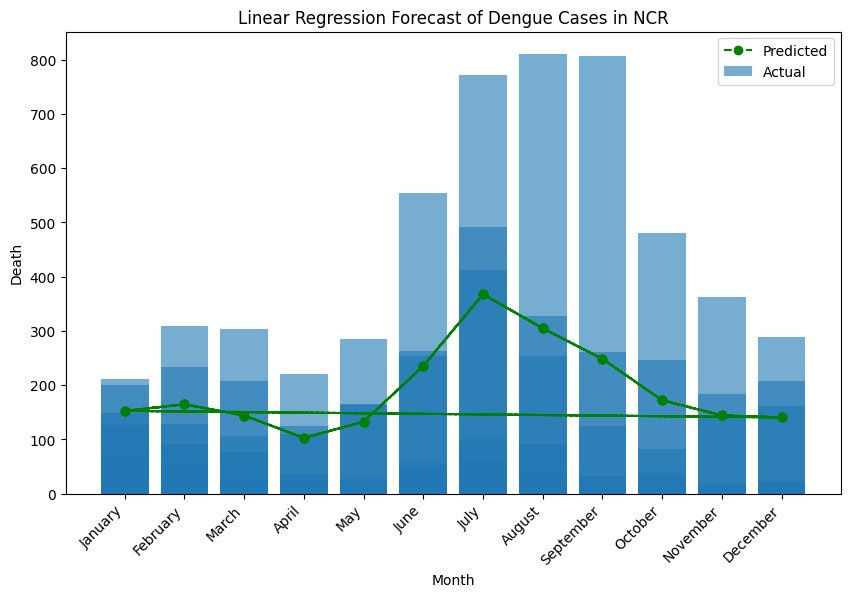

In [34]:

# Sort the dataframe by Month
# region_df = region_df.sort_values('Month')

plt.figure(figsize=(10,6))
plt.bar(region_df['Month'], region_df['Dengue_Cases'], label='Actual', alpha=0.6)
plt.plot(region_df['Month'], region_df['Dengue_Predicted_Cases'], label='Predicted', linestyle='--', marker='o', color="green")
plt.legend()
plt.title('Linear Regression Forecast of Dengue Cases in NCR')
plt.xlabel('Month')
plt.ylabel('Death')
plt.xticks(rotation=45, ha='right')
plt.show()

## Logistic Regression
---

In [35]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date
0,January,2016,Region I,705,1,0.141844,2016-01-01
840,January,2016,NCR,1261,4,0.317209,2016-01-01
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01
120,January,2016,Region III,1976,3,0.151822,2016-01-01
...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01
899,December,2020,NCR,658,4,0.607903,2020-12-01
59,December,2020,Region I,1081,1,0.092507,2020-12-01
659,December,2020,Region X,281,1,0.355872,2020-12-01


In [46]:
dengue['High_Cases'] = (dengue['Dengue_Cases'] > dengue['Dengue_Cases'].median()).astype(int)
dengue['Dengue_Cases'].median()
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate,Date,High_Cases
0,January,2016,Region I,705,1,0.141844,2016-01-01,1
840,January,2016,NCR,1261,4,0.317209,2016-01-01,1
780,January,2016,Region XIII,1116,6,0.537634,2016-01-01,1
240,January,2016,Region IV-B,203,1,0.492611,2016-01-01,0
120,January,2016,Region III,1976,3,0.151822,2016-01-01,1
...,...,...,...,...,...,...,...,...
119,December,2020,Region II,96,0,0.000000,2020-12-01,0
899,December,2020,NCR,658,4,0.607903,2020-12-01,1
59,December,2020,Region I,1081,1,0.092507,2020-12-01,1
659,December,2020,Region X,281,1,0.355872,2020-12-01,0


In [48]:
df_encoded = pd.get_dummies(dengue[['Region', 'Month']], drop_first=True)

df_model = pd.concat([df_encoded, dengue[['Year', 'Dengue_Cases', 'High_Cases']]], axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X = df_model.drop('High_Cases', axis=1)
y = df_model['High_Cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[107   0]
 [  1  96]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.99      0.99        97

    accuracy                           1.00       204
   macro avg       1.00      0.99      1.00       204
weighted avg       1.00      1.00      1.00       204

